In [1]:
import pandas as pd
import re
import numpy as np
from matplotlib_venn import venn2, venn2_circles
from matplotlib import pyplot as plt
import matplotlib
from bs4 import BeautifulSoup
import urllib
from pprint import pprint

# Investigate scraping user descriptions

In [2]:
data = pd.read_table('/usr2/kmaki/tumblr/otherkin_antikin.tsv', error_bad_lines=False)

b'Skipping line 5748: expected 24 fields, saw 43\n'
b'Skipping line 59580: expected 24 fields, saw 25\nSkipping line 59821: expected 24 fields, saw 25\nSkipping line 60027: expected 24 fields, saw 25\nSkipping line 60028: expected 24 fields, saw 25\nSkipping line 60029: expected 24 fields, saw 25\nSkipping line 60097: expected 24 fields, saw 25\nSkipping line 60280: expected 24 fields, saw 25\nSkipping line 60718: expected 24 fields, saw 25\nSkipping line 60980: expected 24 fields, saw 25\nSkipping line 61089: expected 24 fields, saw 25\nSkipping line 61273: expected 24 fields, saw 25\nSkipping line 61589: expected 24 fields, saw 25\nSkipping line 64323: expected 24 fields, saw 25\n'
b'Skipping line 78813: expected 24 fields, saw 61\nSkipping line 78814: expected 24 fields, saw 63\nSkipping line 78815: expected 24 fields, saw 67\nSkipping line 78816: expected 24 fields, saw 32\nSkipping line 78817: expected 24 fields, saw 63\nSkipping line 78818: expected 24 fields, saw 41\nSkipping li

In [4]:
have_urls = data[data['post_short_url'].map(lambda x: isinstance(x, str))]
len(have_urls)

95269

In [22]:
# Get page and find user description
url = data.loc[144883, 'post_short_url']
soup = BeautifulSoup(urllib.request.urlopen(url).read(), 'html.parser')
soup.prettify()

'<!DOCTYPE html>\n<script>\n var __pbpa = true;\n</script>\n<script>\n var translated_warning_string = \'Warning: Never enter your Tumblr password unless \\u201chttps://www.tumblr.com/login\\u201d\\x0ais the address in your web browser.\\x0a\\x0aYou should also see a green \\u201cTumblr, Inc.\\u201d identification in the address bar.\\x0a\\x0aSpammers and other bad guys use fake forms to steal passwords.\\x0a\\x0aTumblr will never ask you to log in from a user\\u2019s blog.\\x0a\\x0aAre you absolutely sure you want to continue?\';\n</script>\n<script language="javascript" src="https://assets.tumblr.com/assets/scripts/pre_tumblelog.js?_v=7e0654d636b56bfe6a0970b99e23e0f7" type="text/javascript">\n</script>\n<!DOCTYPE html>\n<!--[if IE 8]><html class="lt-ie10 lt-ie9"> <![endif]-->\n<!--[if IE 9]><html class="lt-ie10"> <![endif]-->\n<!--[if gt IE 9]><!-->\n<html>\n <!--<![endif]-->\n <head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# blog: http://ogp.me/ns/blog#">\n  <meta conten

In [23]:
type(soup.span)

bs4.element.Tag

In [24]:
soup.span.contents

["\r\n                                I've been around in therian/otherkin communities for the past 20 years. While I'm mostly a lone wolf, I decided to step out of the shadows two years ago and make Therian Guide my home.",
 <br/>,
 "\nIn under a year's time I was elected to administrate the site/community and I'm now one of it's proud co-owners.\r\n                            "]

In [27]:
soup.span.text

"\r\n                                I've been around in therian/otherkin communities for the past 20 years. While I'm mostly a lone wolf, I decided to step out of the shadows two years ago and make Therian Guide my home.\nIn under a year's time I was elected to administrate the site/community and I'm now one of it's proud co-owners.\r\n                            "

In [26]:
url

'https://tmblr.co/ZZ5kKf2LH2T5P'

In [7]:
# Assemble unique tumblog_ids, then get pages from that
tumblog_ids = have_urls['tumblog_id'].unique()
len(tumblog_ids)

10338

In [11]:
tumblog_ids[:10]

array([235470189.0, 213613206.0, 120285572.0, 298717225.0, 58293823.0,
       21996725.0, 112775140.0, 226119364.0, 256075828.0, 10923257.0], dtype=object)

In [28]:
# Scrape user descriptions
outlines = list()
for i, tumblog_id in enumerate(tumblog_ids[:10]):
    url = data.loc[(data['tumblog_id']==tumblog_id).idxmax(), 'post_short_url']
    print('{0}: {1}'.format(i,url))
    
    try:
        soup =  BeautifulSoup(urllib.request.urlopen(url).read(), 'html.parser')
    except urllib.error.HTTPError as _:
        print('404\n')
        continue
        
    # Want match all of them that returns the 'right' info, or perhaps biggest string
    
    # soup.span name='description'
    found_tag = soup.findAll("span", {"class": "description"})
    if found_tag:
        user_desc = found_tag.text
        print(user_desc)
    else:
        print()
        continue
        
    outlines.append([url, user_desc])
    print()
        
len(outlines)

0: https://tmblr.co/Z0Jv-j2FK41Tp

1: https://tmblr.co/ZcQ4tl1l9EWB0
unintentionally-refs reblogged this from other-otherkin 

2: https://tmblr.co/ZJdHnk1lw7DNk


3: https://tmblr.co/ZJ4Rog2FK5c2x

                                An archive of the cringyness that is otherkin. Join in on the fun by submitting the cringe, ranting about kin, or telling your own cringe worthy otherkin stories.
I run this blog solo and tend to get caught up in life so when things abruptly stop for periods of time don't worry I always come back to spread the cringey goodness.
If you want to call me anything resembling a name call me Dodo.
                            

4: https://tmblr.co/Zm6f3n1Ns9d2v
, 

5: https://tmblr.co/Zm6f3n1O7igUl
, 

6: https://tmblr.co/ZO5ltr1paFWkl


7: https://tmblr.co/Zu9N7l2FK9btf
404

8: https://tmblr.co/Z8a5Lj1v0x8KO

                                A friendly blog to all fictionkin, Therians, otherkin, and others I may not have mentioned.
                            

9: htt

8

In [77]:
pprint(outlines)

[['https://tmblr.co/ZcQ4tl1l9EWB0',
  [<a class="tumblelog" href="https://unintentionally-refs.tumblr.com/" rel="nofollow" title="Lots and Lots of refs">unintentionally-refs</a>,
   ' reblogged this from ',
   <a class="source_tumblelog" href="http://other-otherkin.tumblr.com/" rel="nofollow" title="Otherkin shop">other-otherkin</a>,
   ' ']],
 ['https://tmblr.co/ZJdHnk1lw7DNk', []],
 ['https://tmblr.co/ZJ4Rog2FK5c2x',
  ['\r\n'
   '                                An archive of the cringyness that is '
   'otherkin. Join in on the fun by submitting the cringe, ranting about kin, '
   'or telling your own cringe worthy otherkin stories.',
   <br/>,
   '\n'
   'I run this blog solo and tend to get caught up in life so when things '
   "abruptly stop for periods of time don't worry I always come back to spread "
   'the cringey goodness.',
   <br/>,
   '\n'
   'If you want to call me anything resembling a name call me Dodo.\r\n'
   '                            ']],
 ['https://tmblr.co/ZJ4

In [63]:
have_urls['post_short_url'].values[1]

'https://tmblr.co/ZcQ4tl1l9EWB0'

In [64]:
have_urls['post_short_url'].values[2]

'https://tmblr.co/ZJdHnk1lw7DNk'

In [65]:
have_urls['post_short_url'].values[3]

'https://tmblr.co/ZJ4Rog2FK5c2x'

# Antikin/otherkin data

In [18]:
data = pd.read_table('/usr2/kmaki/tumblr/otherkin_antikin.tsv', error_bad_lines=False)

b'Skipping line 5748: expected 24 fields, saw 43\n'
b'Skipping line 59580: expected 24 fields, saw 25\nSkipping line 59821: expected 24 fields, saw 25\nSkipping line 60027: expected 24 fields, saw 25\nSkipping line 60028: expected 24 fields, saw 25\nSkipping line 60029: expected 24 fields, saw 25\nSkipping line 60097: expected 24 fields, saw 25\nSkipping line 60280: expected 24 fields, saw 25\nSkipping line 60718: expected 24 fields, saw 25\nSkipping line 60980: expected 24 fields, saw 25\nSkipping line 61089: expected 24 fields, saw 25\nSkipping line 61273: expected 24 fields, saw 25\nSkipping line 61589: expected 24 fields, saw 25\nSkipping line 64323: expected 24 fields, saw 25\n'
b'Skipping line 78813: expected 24 fields, saw 61\nSkipping line 78814: expected 24 fields, saw 63\nSkipping line 78815: expected 24 fields, saw 67\nSkipping line 78816: expected 24 fields, saw 32\nSkipping line 78817: expected 24 fields, saw 63\nSkipping line 78818: expected 24 fields, saw 41\nSkipping li

In [22]:
print(len(data))
print(data.columns)

355969
Index(['post_id', 'activity_time_epoch', 'tumblog_id', 'post_title',
       'post_short_url', 'post_type', 'post_caption', 'post_format',
       'post_note_count', 'created_time_epoch', 'updated_time_epoch',
       'source_title', 'source_url', 'post_classifier', 'blog_classifier',
       'reblogged_from_post_id', 'reblogged_from_metadata', 'root_post_id',
       'body', 'include_first_tag', 'include_second_tag', 'mentions',
       'post_tags', 'post_content'],
      dtype='object')


In [23]:
data['post_tags'][:10]

0    {(otherkin),(otherimgs),(wolfkin),(fallenangel...
1    {(rosekin),(flowerkin),(naturekin),(forestkin)...
2                   {(otherkin),(mythkin),(dragonkin)}
3                               {(perfect),(anti kin)}
4                                                  NaN
5                                                  NaN
6                                                  NaN
7                                {(otherkin),(cringe)}
8    {(otherkin),(submission),(starkin),(spacekin),...
9                                                  NaN
Name: post_tags, dtype: object

In [28]:
data.iloc[:10,:]

,post_id,activity_time_epoch,tumblog_id,post_title,post_short_url,post_type,post_caption,post_format,post_note_count,created_time_epoch,...,blog_classifier,reblogged_from_post_id,reblogged_from_metadata,root_post_id,body,include_first_tag,include_second_tag,mentions,post_tags,post_content
0,153881679731,1480550445000,2.3547e+08,NaN,https://tmblr.co/Z0Jv-j2FK41Tp,photo,<p>побе́гать<br/>verb | ‎(pobégatʹ) to run for...,html,0.0,1.480550e+12,...,safe,NaN,[],-1.000000e+00,NaN,True,False,{},"{(otherkin),(otherimgs),(wolfkin),(fallenangel...","[mentions#{},format#html,caption#<p>побе́гать<..."
1,119340139200,1480550520000,2.13613e+08,NaN,https://tmblr.co/ZcQ4tl1l9EWB0,photo,<h2><b>Rosekin bath supplies requested by anon...,html,136.0,1.432013e+12,...,safe,NaN,[],-1.000000e+00,NaN,True,False,{},"{(rosekin),(flowerkin),(naturekin),(forestkin)...","[mentions#{},format#html,caption#<h2><b>Roseki..."
2,120160310766,1480550866000,1.20286e+08,NaN,https://tmblr.co/ZJdHnk1lw7DNk,photo,<p><b>Today’s Kintype of the Day is: </b>Drago...,html,39.0,1.432872e+12,...,safe,NaN,[],-1.000000e+00,NaN,True,False,{},"{(otherkin),(mythkin),(dragonkin)}","[mentions#{},format#html,caption#<p><b>Today’s..."
3,153882091707,1480551146000,2.98717e+08,Arguing with otherkin be like,https://tmblr.co/ZJ4Rog2FK5c2x,text,NaN,html,1766.0,1.480551e+12,...,safe,1.53879e+11,"[root_post_id#104487936288,root_post_blog_id#1...",1.044879e+11,"<p><a href=""http://equalityinomnicide.tumblr.c...",False,True,{},"{(perfect),(anti kin)}","[mentions#{},format#html,accepts_answers#false..."
4,"<p><a class=""photoset_photo rapid-noclick-resp...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"<p><a class=""photoset_photo rapid-noclick-resp...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"</blockquote>,note_count#1766,slug#arguing-wit...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,153882127512,1480551208000,2.98717e+08,NaN,https://tmblr.co/ZJ4Rog2FK5koO,photo,"<p>examples of stupid pronouns. seriously, dwa...",html,2284.0,1.480551e+12,...,safe,1.26584e+11,"[root_post_id#126583987518,root_post_blog_id#2...",1.265840e+11,NaN,True,False,{},"{(otherkin),(cringe)}","[mentions#{},format#html,caption#<p>examples o..."
8,94324027577,1480551281000,5.82938e+07,NaN,https://tmblr.co/Zm6f3n1Ns9d2v,photo,<p>Grey Nebula Tights -$7</p> <p>They’re reall...,html,244.0,1.407660e+12,...,safe,NaN,[],-1.000000e+00,NaN,True,False,{},"{(otherkin),(submission),(starkin),(spacekin),...","[mentions#{},format#html,caption#<p>Grey Nebul..."
9,"<p>They’re really great, especially since they...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
def split_tags(tags, sep=',', combine_words=False):
    """ 
        Returns list of tags from Tumblr's format (default) or Python list format 
        
        Args:
            combine_words: whether or not to return multi-word tags combined, with no spaces
    """
    
    # Check for NaN
    if not isinstance(tags, str):
        return []
    
    spaced_tags = [tag[1:-1] for tag in tags[1:-1].split(sep)]
    if not combine_words:
        return spaced_tags
    
    else:
        nospace_tags = [tag.replace(' ', '') for tag in spaced_tags]
        return nospace_tags

In [29]:
# Distribution of tags
anti_p = re.compile('anti[-\s_]?kin', re.IGNORECASE)
other_p = re.compile('other[-\s_]?kin', re.IGNORECASE)
anti_rows = data[data['post_tags'].map(lambda x: has_tag_re(x, anti_p))].index
other_rows = data[data['post_tags'].map(lambda x: has_tag_re(x, other_p))].index

len_anti = len(anti_rows)
len_other = len(other_rows)
len_both = len(set(anti_rows).intersection(set(other_rows)))
print(len_anti)
print(len_other)
print(len_both)

3407
93789
1977


In [49]:
len(set(anti_rows).intersection(set(other_rows)))

884

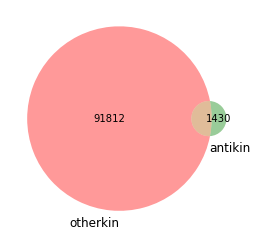

In [30]:
%matplotlib inline
v = venn2(subsets=(len_other-len_both,len_anti-len_both,len_both), set_labels=('otherkin', 'antikin', 'both'))
# v.get_label_by_id('10').set_text('')
# v.get_label_by_id('01').set_text('')
v.get_label_by_id('11').set_text('')
# venn2_circles(subsets=(90449-884,2332-884,884))
plt.savefig('/usr2/mamille2/tumblr/otherkin_antikin.png', dpi=400)

In [45]:
def has_tag(text, tags):
    """ Takes in a Tumblr hashtag list and list of tags and returns whether any of them are present """
    
    return any(tag in split_tags(text) for tag in tags)

In [25]:
def has_tag_re(text, regex):
    """ Takes in a Tumblr hashtag text list and regex and returns whether there are any matches """
    
    if not isinstance(text, str):
        return False
    
    else:
        return any(re.match(regex, tag) for tag in split_tags(text))

## Investigate rows with no tags--is newlines in post_content causing error

In [27]:
notags = data[data['post_tags'].map(lambda x: isinstance(x, float))]
len(notags)

260748

In [32]:
# No tag data has *kin somewhere else?
notags_types = {}

# for field in ['post_id', 'body', 'post_caption', 'post_content']:
for field in ['post_id', 'post_title']:
    notags_types[field] = notags[notags[field].map(lambda x: 'kin' in x if isinstance(x, str) else False)]
    print("{0}:\t{1}".format(field, len(notags_types[field])))

post_id:	62706
post_title:	0


In [34]:
pd.set_option('display.max_colwidth', 999)

In [38]:
pd.set_option('display.max_columns', 999)

In [39]:
notags.iloc[:100,:]

,post_id,activity_time_epoch,tumblog_id,post_title,post_short_url,post_type,post_caption,post_format,post_note_count,created_time_epoch,updated_time_epoch,source_title,source_url,post_classifier,blog_classifier,reblogged_from_post_id,reblogged_from_metadata,root_post_id,body,include_first_tag,include_second_tag,mentions,post_tags,post_content
4,"<p><a class=""photoset_photo rapid-noclick-resp"" href=""http://33.media.tumblr.com/14dfe59ace608b7f746c312290678c48/tumblr_nfrukuVAUo1shdhdjo1_500.gif"" id=""photoset_link_103909364090_1"" data-photoset-index=""1""><img alt="""" src=""https://68.media.tumblr.com/14dfe59ace608b7f746c312290678c48/tumblr_nfrukuVAUo1shdhdjo1_500.gif"" data-pin-description=""Studio Ghibli GIFs"" data-pin-url=""http://studioghifli.com/post/103838762321""/></a></p>",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"<p><a class=""photoset_photo rapid-noclick-resp"" href=""http://38.media.tumblr.com/f07b7d73cb549d422475f40122211fd0/tumblr_nfrukuVAUo1shdhdjo2_500.gif"" id=""photoset_link_103909364090_2"" data-photoset-index=""2""><img alt="""" src=""https://68.media.tumblr.com/f07b7d73cb549d422475f40122211fd0/tumblr_nfrukuVAUo1shdhdjo2_500.gif"" data-pin-description=""Studio Ghibli GIFs"" data-pin-url=""http://studioghifli.com/post/103838762321""/></a></p>",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"</blockquote>,note_count#1766,slug#arguing-with-otherkin-be-like,source_url#http://equalityinomnicide.tumblr.com/post/104487936288/arguing-with-otherkin-be-like,tags#{(perfect),(anti kin)},source_title#equalityinomnicide]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"<p>They’re really great, especially since they’re a neutral, they go with anything!</p>,photos#[{""caption"":"""",""is_panorama"":false,""alt_sizes"":[{""width"":385,""url"":""http:\/\/66.media.tumblr.com\/95fd48c7371ee13ba487af19473c9746\/tumblr_n9lvtafHhd1tgpa7jo1_400.jpg"",""height"":385},{""width"":250,""url"":""http:\/\/65.media.tumblr.com\/95fd48c7371ee13ba487af19473c9746\/tumblr_n9lvtafHhd1tgpa7jo1_250.jpg"",""height"":250},{""width"":100,""url"":""http:\/\/66.media.tumblr.com\/95fd48c7371ee13ba487af19473c9746\/tumblr_n9lvtafHhd1tgpa7jo1_100.jpg"",""height"":100},{""width"":75,""url"":""http:\/\/66.media.tumblr.com\/95fd48c7371ee13ba487af19473c9746\/tumblr_n9lvtafHhd1tgpa7jo1_75sq.jpg"",""height"":75}],""original_size"":{""width"":385,""url"":""http:\/\/66.media.tumblr.com\/95fd48c7371ee13ba487af19473c9746\/tumblr_n9lvtafHhd1tgpa7jo1_400.jpg"",""height"":385},""exif"":{}}],note_count#244,slug#grey-nebula-tights-7-theyre-really-great,tags#{(otherkin),(submission),(starkin),(spacekin),(celestialkin)}]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,"<p><a href=""https://www.etsy.com/listing/171705731/the-universe-nail-polish-8-ml-vegan-non?ref=sr_gallery_30&amp;ga_search_query=space&amp;ga_order=most_relevant&amp;ga_ship_to=US&amp;ga_min=0&amp;ga_max=20&amp;ga_search_type=handmade&amp;ga_view_type=gallery"">buy it here!</a></p>,photos#[{""caption"":"""",""is_panorama"":false,""alt_sizes"":[{""width"":570,""url"":""http:\/\/65.media.tumblr.com\/bc238889434d3a52c7012a98295053e5\/tumblr_na4dqh3Ixg1tgpa7jo1_1280.jpg"",""height"":518},{""width"":540,""url"":""http:\/\/65.media.tumblr.com\/bc238889434d3a52c7012a98295053e5\/tumblr_na4dqh3Ixg1tgpa7jo1_540.jpg"",""height"":491},{""width"":500,""url"":""http:\/\/67.media.tumblr.com\/bc238889434d3a52c7012a98295053e5\/tumblr_na4dqh3Ixg1tgpa7jo1_500.jpg"",""height"":454},{""width"":400,""url"":""http:\/\/66.media.tumblr.com\/bc238889434d3a52c7012a98295053e5\/tumblr_na4dqh3Ixg1tgpa7jo1_400.jpg"",""height"":364},{""width"":250,""url"":""http:\/\/66.media.tumblr.com\/bc238889434d3a52c7012a98295053e5\/tumblr_na4dqh3Ixg1tgpa7jo1_250.jpg"",""...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# Look at I'm ___ trash

In [ ]:
# Load data
data = pd.read_pickle('/usr2/mamille2/tumblr/data/halfday_text.pkl')
print(data.columns)
print(len(data))

In [ ]:
# Search for I'm ___ trash

trash_re = re.compile(r"(?:I'm|i'm|Im|im).{1,30}(?:trash|Trash|TRASH)")

def trash_present(text):
    """ Return T/F for presence I'm ____ trash """
    
    if not isinstance(text, str):
        return False
    
    if re.search(trash_re, text):
        return True
    else:
        return False

def trash_match(text):
    """ Return match object for I'm ____ trash """
    
    if not isinstance(text, str):
        return None
    
    return re.search(trash_re, text)

In [ ]:
trash_present("I'm star wars trash")

In [ ]:
trash_present("yada")

In [ ]:
trash_data = data[data['body'].map(trash_present)]
len(trash_data)

In [ ]:
trash_data

In [ ]:
type(trash_data.loc[:,'body'])

In [ ]:
pd.set_option('display.max_colwidth', 999)

In [ ]:
trash_data.loc[:,['body']]